In [19]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined = pd.merge(mouse_data, clinical_trial_data, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
combined.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#mean_tumor_volume = combined.groupby(["Drug","Timepoint"]).mean()
# Convert to DataFrame
#response_df = pd.DataFrame(mean_tumor_volume)
# Preview DataFrame
#response_df.head()


In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#standard_mean_chart = combined[["Drug","Timepoint","Tumor Volume (mm3)"]]
grouped_mean = combined.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
grouped_mean_df = pd.DataFrame(grouped_mean)
grouped_mean_df.head().reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint


# Convert to DataFrame

# Preview DataFrame



In [5]:
grouped_standard_err = combined.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
grouped_err_df = pd.DataFrame(grouped_standard_err)
grouped_err_df.head().reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
#tried .pivot() also
grouped_mean_df = grouped_mean_df.reset_index()
grouped_mean_df_pivot = grouped_mean_df.pivot(index="Timepoint", columns="Drug") ["Tumor Volume (mm3)"]

grouped_err_df = grouped_err_df.reset_index()
grouped_err_df_pivot = grouped_err_df.pivot(index="Timepoint", columns="Drug") ["Tumor Volume (mm3)"]
# Preview that Reformatting worked
grouped_mean_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


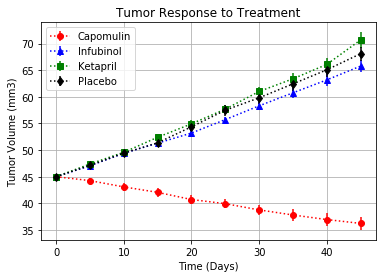

In [7]:
# Generate the Plot (with Error Bars)
#lines = drugs (Capomulin, Infubinol, Ketapril, Placebo)
plt.errorbar(grouped_mean_df_pivot.index,grouped_mean_df_pivot["Capomulin"],yerr=grouped_err_df_pivot["Capomulin"], label="Capomulin", color="red", marker="o", linestyle=":")
plt.errorbar(grouped_mean_df_pivot.index,grouped_mean_df_pivot["Infubinol"],yerr=grouped_err_df_pivot["Infubinol"], label="Infubinol",color="blue", marker="^", linestyle=":")
plt.errorbar(grouped_mean_df_pivot.index,grouped_mean_df_pivot["Ketapril"],yerr=grouped_err_df_pivot["Ketapril"], label="Ketapril", color="green", marker="s", linestyle=":")
plt.errorbar(grouped_mean_df_pivot.index,grouped_mean_df_pivot["Placebo"],yerr=grouped_err_df_pivot["Placebo"], label="Placebo",color="black", marker="d", linestyle=":")
#error bars
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.legend(loc="upper left")
plt.grid()


# Save the Figure
plt.savefig("data/metastatic.png")


In [8]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [10]:
met_site = combined[["Drug", "Timepoint", "Metastatic Sites"]]
grouped_met_mean = met_site.groupby(["Drug", "Timepoint"]).mean()
grouped_met_mean_df = pd.DataFrame(grouped_met_mean)
grouped_met_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [12]:
grouped_met_sem = met_site.groupby(["Drug", "Timepoint"]).sem()
grouped_met_sem_df = pd.DataFrame(grouped_met_sem)
grouped_met_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [13]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [20]:
grouped_met_mean_df = grouped_met_mean_df.reset_index()
grouped_met_mean_df_pivot = grouped_met_mean_df.pivot(index="Timepoint", columns="Drug") ["Metastatic Sites"]

grouped_met_sem_df = grouped_met_sem_df.reset_index()
grouped_met_sem_df_pivot = grouped_met_sem_df.pivot(index="Timepoint", columns="Drug") ["Metastatic Sites"]
grouped_mean_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


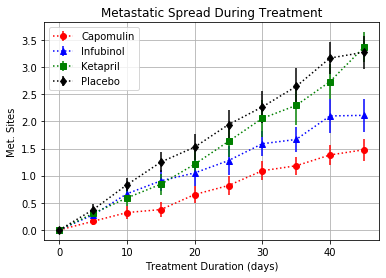

In [21]:
# Generate the Plot (with Error Bars)
plt.errorbar(grouped_met_mean_df_pivot.index,grouped_met_mean_df_pivot["Capomulin"],yerr=grouped_met_sem_df_pivot["Capomulin"], label="Capomulin", color="red", marker="o", linestyle=":")
plt.errorbar(grouped_met_mean_df_pivot.index,grouped_met_mean_df_pivot["Infubinol"],yerr=grouped_met_sem_df_pivot["Infubinol"], label="Infubinol", color="blue", marker="^", linestyle=":")
plt.errorbar(grouped_met_mean_df_pivot.index,grouped_met_mean_df_pivot["Ketapril"],yerr=grouped_met_sem_df_pivot["Ketapril"], label="Ketapril", color="green", marker="s", linestyle=":")
plt.errorbar(grouped_met_mean_df_pivot.index,grouped_met_mean_df_pivot["Placebo"],yerr=grouped_met_sem_df_pivot["Placebo"], label="Placebo", color="black", marker="d", linestyle=":")

plt.title("Metastatic Spread During Treatment")
plt.legend(loc="upper left")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Met. Sites")
plt.grid()

# Save the Figure
plt.savefig("data/tumor_response.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [22]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [23]:
population_df = combined.groupby(["Drug","Timepoint"]).count()["Tumor Volume (mm3)"]
#combined_copy = combined.copy()
population_df = pd.DataFrame({"Mouse Count":population_df})
#mouse_count.head()
#print(num_mice)
population_df.head().reset_index()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [24]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [25]:
population_df = population_df.reset_index()
population_df_pivot = population_df.pivot(index="Timepoint", columns="Drug") ["Mouse Count"]
population_df_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


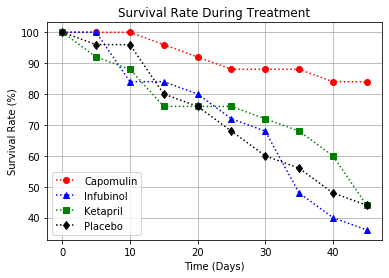

In [29]:
# Generate the Plot (Accounting for percentages)

plt.plot(100 * population_df_pivot["Capomulin"]/25, label="Capomulin", color="red", marker="o", linestyle=":")
plt.plot(100 * population_df_pivot["Infubinol"]/25, label="Infubinol", color="blue", marker="^", linestyle=":")
plt.plot(100 * population_df_pivot["Ketapril"]/25, label="Ketapril", color="green", marker="s", linestyle=":")
plt.plot(100 * population_df_pivot["Placebo"]/25, label="Placebo", color="black", marker="d", linestyle=":")

#plt.errorbar(grouped_met_mean_df_pivot.index,grouped_met_mean_df_pivot["Capomulin"],yerr=grouped_met_sem_df_pivot["Capomulin"])


plt.title("Survival Rate During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="lower left")
plt.grid()

# Save the Figure
plt.savefig("data/survival.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [27]:
# Calculate the percent changes for each drug
mean_change = 100 * (grouped_mean_df_pivot.iloc[-1] - grouped_mean_df_pivot.iloc[0])/grouped_mean_df_pivot.iloc[0]
std_err_change = 100 * (grouped_err_df_pivot.iloc[-1] - grouped_err_df_pivot.iloc[0])/grouped_err_df_pivot.iloc[0]
print(mean_change)
# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


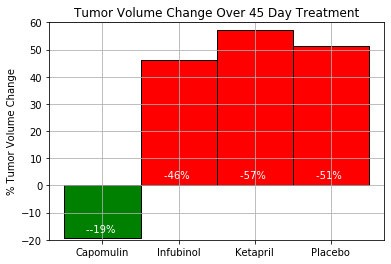

In [28]:
# Store all Relevant Percent Changes into a Tuple
mean_changes = (mean_change["Capomulin"],
               mean_change["Infubinol"],
               mean_change["Ketapril"],
               mean_change["Placebo"])

# Splice the data between passing and failing drugs

fig, ax = plt.subplots()
ind= np.arange(len(mean_changes))
width = 1
rects_pass = ax.bar(ind[0], mean_changes[0], width, color="green", ec="black")
rects_fail = ax.bar(ind[1:], mean_changes[1:], width, color="red", ec="black")

# Orient widths. Add labels, tick marks, etc. 
ax.set_title("Tumor Volume Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_ylim(-20,60)
ax.set_xticks(ind)
ax.set_xticklabels(("Capomulin","Infubinol","Ketapril", "Placebo"))
ax.grid(True)

# Use functions to label the percentages of changes
def labelpass(rects):
    for rect in rects:
        height=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, -18, "-%d%% " % int(height), ha="center", va="bottom", color="white")

def labelfail(rects):
    for rect in rects:
        height=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 2, "-%d%% " % int(height) , ha="center", va="bottom", color="white")

# Call functions to implement the function calls
labelpass(rects_pass)
labelfail(rects_fail)


# Save the Figure
plt.savefig("data/summary.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

Three Observable trends: 
Capomulin is the only drug out of the four drugs to shrink tumors over the treatment period. All other drugs showed tumor growth.
Mice on Capomulin also showed the slowest metastatic growth, with only 1 new metastatic site on average over the 45 days. 
The survival rate was highest for mice on Capomulin, with 21/25 surviving over 45 days compared to 9 or 11 on the other three drugs.